In [75]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [76]:
#Datos
t_shallowB = pd.read_csv(r't_shallowB.csv') #Es un 38% de toda la región
t_mc = pd.read_csv(r't_mc.csv')

#Dataframes de los parámetros
kernel = pd.DataFrame(t_mc, columns= ['kernel'])
sf_threshold = pd.DataFrame(t_mc, columns= ['sf_threshold'])
rms = pd.DataFrame(t_mc, columns= ['rms_mode'])
flux = pd.DataFrame(t_mc, columns= ['flux_range'])
rel_threshold = pd.DataFrame(t_mc, columns= ['rel_threshold'])
bfe = pd.DataFrame(t_mc, columns= ['bf+e'])

In [77]:
#Cuenta de elementos kernel
kernel_count = kernel['kernel'].value_counts()
gaussian = kernel_count[0]
boxcar = kernel_count[1]
kernel_keys = ['Gaussian', 'Boxcar']
kernel_values = [gaussian, boxcar]
#print(kernel_count)

#Cuenta de elementos rms
rms_count = rms['rms_mode'].value_counts()
gffh = rms_count[0]
gfnf = rms_count[1]
mad = rms_count[2]
rms_keys = ['GFFH', 'GFNF', 'MAD']
rms_values = [gffh, gfnf, mad]
#print(rms_count)

#Cuenta de elementos flux range
flux_count = flux['flux_range'].value_counts()
alls = flux_count[0]
negative = flux_count[1]
positive = flux_count[2]
flux_keys = ['All', 'Negative', 'Positive']
flux_values = [alls, negative, positive]
#print(flux_count)

#Cuenta de source parametrization
bfe_count = bfe['bf+e'].value_counts()
only_busy  = bfe_count[1]
none = bfe_count[0]
both = bfe_count[3]
only_elipse = bfe_count[2]
bfe_keys = ['Ninguno', 'Busy function', 'Elipse', 'Ambos']
bfe_values = [none, only_busy, only_elipse, both]
#print(bfe_count)

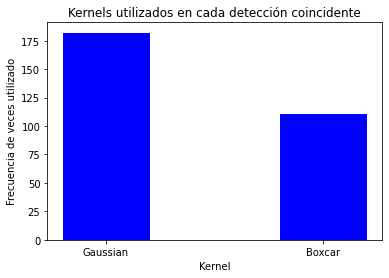

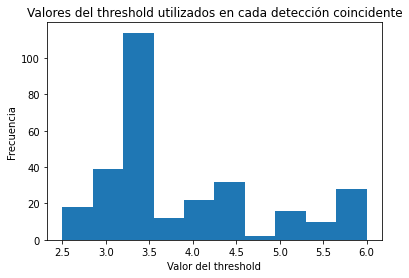

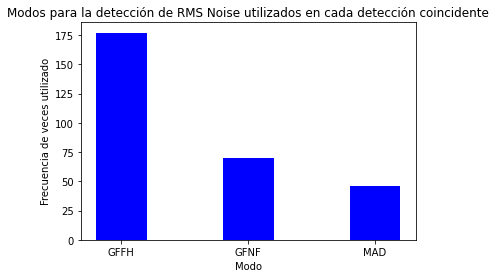

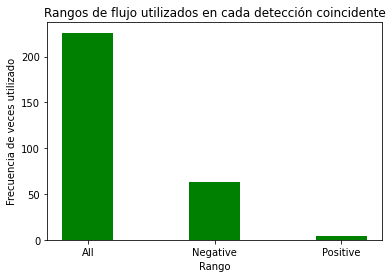

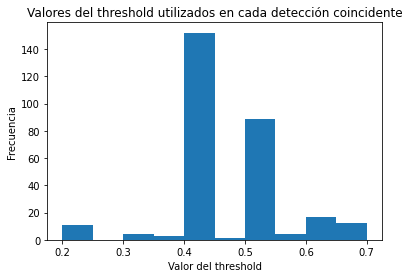

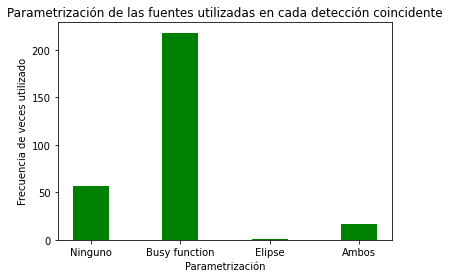

In [78]:
#Gráfico kernel
plt.bar(kernel_keys,
       kernel_values,
       color = 'blue',
        width = 0.4)

plt.title("Kernels utilizados en cada detección coincidente")
plt.xlabel("Kernel")
plt.ylabel("Frecuencia de veces utilizado")
plt.show()

#Gráfico source finding threshold
y,x,_ = plt.hist(sf_threshold)

plt.title("Valores del threshold utilizados en cada detección coincidente")
plt.xlabel("Valor del threshold")
plt.ylabel("Frecuencia")
plt.show()

#Gráfico rms
plt.bar(rms_keys,
        rms_values,
        color = 'blue',
        width = 0.4)

plt.title("Modos para la detección de RMS Noise utilizados en cada detección coincidente")
plt.xlabel("Modo")
plt.ylabel("Frecuencia de veces utilizado")
plt.show()

#Gráfico flux range
plt.bar(flux_keys,
        flux_values,
        color = 'green',
        width = 0.4)

plt.title("Rangos de flujo utilizados en cada detección coincidente")
plt.xlabel("Rango")
plt.ylabel("Frecuencia de veces utilizado")
plt.show()

#Gráfico relaibility threshold
plt.hist(rel_threshold)

plt.title("Valores del threshold utilizados en cada detección coincidente")
plt.xlabel("Valor del threshold")
plt.ylabel("Frecuencia")
plt.show()

#Gráfico source parametrization
plt.bar(bfe_keys,
        bfe_values,
        color = 'green',
        width = 0.4)

plt.title("Parametrización de las fuentes utilizadas en cada detección coincidente")
plt.xlabel("Parametrización")
plt.ylabel("Frecuencia de veces utilizado")
plt.show()

In [79]:
#Datos sección B completa
tsB = pd.read_csv(r't_shallowB.csv') #Es un 38% de la región
ts = pd.read_csv(r'tsc_parcial.csv')
tm = pd.read_csv(r'tm_parcial.csv')

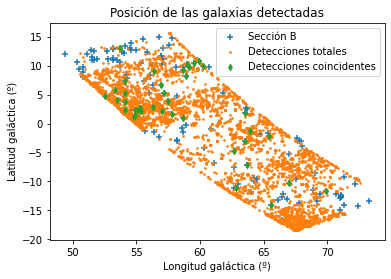

In [80]:
#Dataframes latitud y longitud
lat_tsB = pd.DataFrame(tsB, columns=["GAL_LAT"])
lat_ts = pd.DataFrame(ts, columns=["GAL_LAT"])
lat_tm = pd.DataFrame(tm, columns=["GAL_LAT_1"])

long_tsB = pd.DataFrame(tsB, columns=["GAL_LONG"])
long_ts = pd.DataFrame(ts, columns=["GAL_LONG"])
long_tm = pd.DataFrame(tm, columns=["GAL_LONG_1"])

#Gráficas de las detecciones en la sección B
plt.scatter(long_tsB, lat_tsB,
            marker = '+',
            s=30)

plt.scatter(long_ts, lat_ts,
            marker = '.',
            s=10)

plt.scatter(long_tm, lat_tm,
            marker = 'd',
            s=20)

plt.title("Posición de las galaxias detectadas")
plt.legend(["Sección B", "Detecciones totales", "Detecciones coincidentes"], loc='upper right')
plt.xlabel('Longitud galáctica (º)')
plt.ylabel('Latitud galáctica (º)')

plt.show()

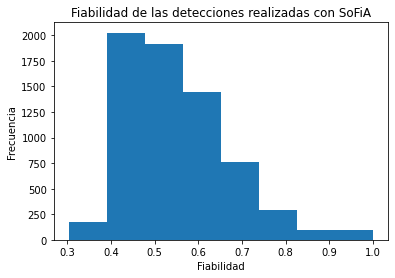

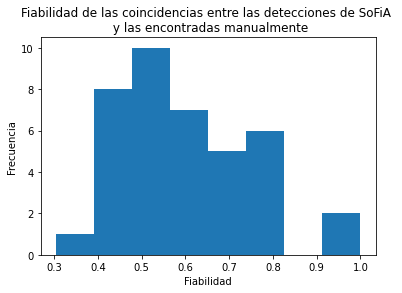

In [81]:
#Dataframes relaibility
rel_ts = pd.DataFrame(ts, columns=['rel'])
rel_tm = pd.DataFrame(tm, columns=['rel'])

#Número de bins
rel_ts_max = float(rel_ts.max())
rel_ts_min = float(rel_ts.min())
n = np.linspace(rel_ts_min,rel_ts_max,9)

#Histogramas relaibility
plt.hist(rel_ts, bins=n)

plt.title("Fiabilidad de las detecciones realizadas con SoFiA")
plt.xlabel('Fiabilidad')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(rel_tm, bins=n)

plt.title("Fiabilidad de las coincidencias entre las detecciones de SoFiA \n y las encontradas manualmente")
plt.xlabel('Fiabilidad')
plt.ylabel('Frecuencia')
plt.show()

In [82]:
#Dataframes frecuencias y velocidades
freq_ts = pd.DataFrame(ts, columns= ['freq'])
freq_tm = pd.DataFrame(tm, columns= ['freq'])

vel_tsB = pd.DataFrame(tsB, columns= ['velcenter'])
vel_tm = pd.DataFrame(tm, columns= ['velcenter'])

#Convertir de frecuencia a velocidades y viceversa
f0 = 1420405751 #Hz
c0 = 299792.458 #km/s

i = 0
j = 0
rts = int(freq_ts.count())
rtsB = int(vel_tsB.count())

freq = []
vel = []

freq_tsB_list = []
vel_ts_list = []

while i < rtsB:
    vel += [float(vel_tsB['velcenter'][i])]
    freq_tsB_list += [f0*(1-(vel[i]/c0))] #Hz
    i += 1
    
while j < rts:
    freq += [float(freq_ts['freq'][j])]
    vel_ts_list += [c0*(1-(freq[j]/f0))] #Hz
    j += 1

#freq_tsB_list
#vel_ts_list

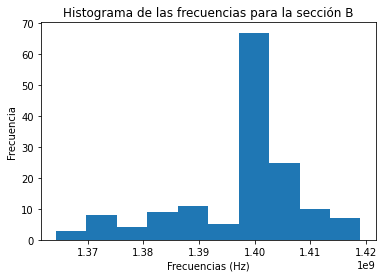

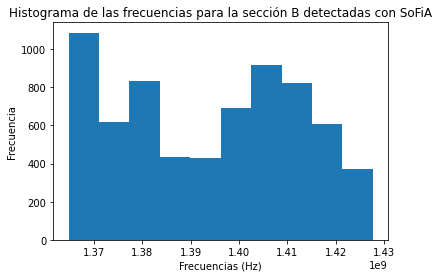

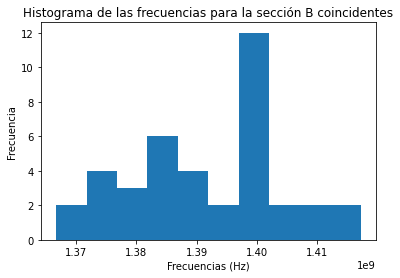

In [83]:
#Histograma frecuencias
plt.hist(freq_tsB_list)

plt.title("Histograma de las frecuencias para la sección B")
plt.xlabel('Frecuencias (Hz)')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(freq_ts)

plt.title("Histograma de las frecuencias para la sección B detectadas con SoFiA")
plt.xlabel('Frecuencias (Hz)')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(freq_tm)

plt.title("Histograma de las frecuencias para la sección B coincidentes")
plt.xlabel('Frecuencias (Hz)')
plt.ylabel('Frecuencia')
plt.show()

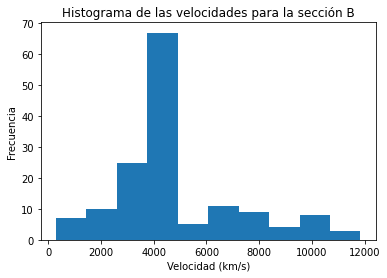

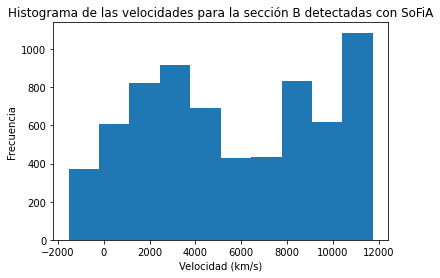

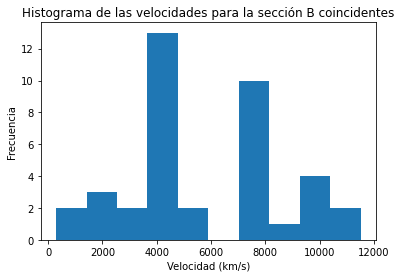

In [10]:
#Histograma velocidades
plt.hist(vel_tsB)

plt.title("Histograma de las velocidades para la sección B")
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(vel_ts)

plt.title("Histograma de las velocidades para la sección B detectadas con SoFiA")
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(vel_tm)

plt.title("Histograma de las velocidades para la sección B coincidentes")
plt.xlabel('Velocidad (km/s)')
plt.ylabel('Frecuencia')
plt.show()

In [132]:
#Código para las estadísticas de los valores
def get_summary_statistics(dataset,string):
    
    titulo = 'Recompilación de las estadísticas: ' + string
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print(titulo)
    print('Min: %s' % min_value)
    print('Promedio: %s' % mean)
    print('Max: %s' % max_value)
    print('25º percentil: %s' % quartile_1)
    print('Mediana: %s' % median)
    print('75º percentil: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('\n')

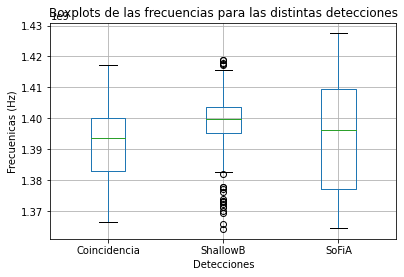

In [133]:
#Código para convertir de notación científica a float
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
                                                            
freq_tsB = pd.DataFrame({'freq':freq_tsB_list})
#freq_tsB.to_csv('freq_tsB.csv')

frecuencias = pd.read_csv(r'frecuencias.csv')
freq = pd.DataFrame(frecuencias, columns = ['tabla','freq'])

#Boxplots frecuencias
freq.boxplot(column = ['freq'], by = "tabla")

plt.title("Boxplots de las frecuencias para las distintas detecciones")
plt.suptitle('')
plt.xlabel('Detecciones')
plt.ylabel('Frecuenicas (Hz)')
plt.show()

In [131]:
#Estadísticas de la frecuencia
f_tsB = freq[freq['tabla'] == 'ShallowB']['freq']
f_ts = freq[freq['tabla'] == 'SoFiA']['freq']
f_m = freq[freq['tabla'] == 'Coincidencia']['freq']

get_summary_statistics(f_tsB, "Frecuencia Shallow B")
get_summary_statistics(f_ts, "Frecuencia SoFiA")
get_summary_statistics(f_m, "Frecuencia coincidencias")

Recompilación de las estadísticas: Frecuencia Shallow B
Min: 1364308262.08
Promedio: 1397356989.06
Max: 1418989099.89
25º percentil: 1395147667.09
Mediana: 1399786133.45
75º percentil: 1403718643.23
Interquartile range (IQR): 8570976.14


Recompilación de las estadísticas: Frecuencia SoFiA
Min: 1364761340.0
Promedio: 1393939557.46
Max: 1427703420.0
25º percentil: 1377329020.0
Mediana: 1396254850.0
75º percentil: 1409510140.0
Interquartile range (IQR): 32181120.0


Recompilación de las estadísticas: Frecuencia coincidencias
Min: 1366689920.0
Promedio: 1391415965.38
Max: 1417236100.0
25º percentil: 1383077955.0
Mediana: 1393688580.0
75º percentil: 1400249790.0
Interquartile range (IQR): 17171835.0




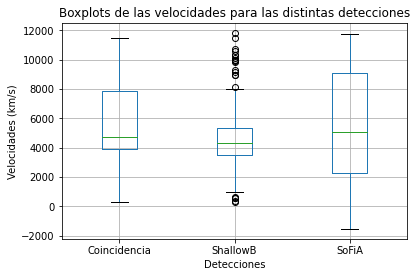

In [114]:
#Código para convertir de notación científica a float
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
                                                            
vel_ts = pd.DataFrame({'velcenter':vel_ts_list})
#vel_ts.to_csv('vel_ts.csv')

velocidades = pd.read_csv(r'velocidades.csv')
vel = pd.DataFrame(velocidades, columns = ['tabla','velcenter'])

#Boxplots frecuencias
vel.boxplot(column = ['velcenter'], by = "tabla")

plt.title("Boxplots de las velocidades para las distintas detecciones")
plt.suptitle('')
plt.xlabel('Detecciones')
plt.ylabel('Velocidades (km/s)')
plt.show()

In [134]:
#Estadísticas de la velocidades
v_tsB = vel[vel['tabla'] == 'ShallowB']['velcenter']
v_ts = vel[vel['tabla'] == 'SoFiA']['velcenter']
v_m = vel[vel['tabla'] == 'Coincidencia']['velcenter']

get_summary_statistics(v_tsB, "Velocidad Shallow B")
get_summary_statistics(v_ts, "Velocidad SoFiA")
get_summary_statistics(v_m, "Velocidad coincidencias")

Recompilación de las estadísticas: Velocidad Shallow B
Min: 299.0
Promedio: 4864.7
Max: 11840.0
25º percentil: 3522.0
Mediana: 4352.0
75º percentil: 5331.0
Interquartile range (IQR): 1809.0


Recompilación de las estadísticas: Velocidad SoFiA
Min: -1540.25
Promedio: 5585.98
Max: 11744.37
25º percentil: 2299.64
Mediana: 5097.32
75º percentil: 9091.82
Interquartile range (IQR): 6792.18


Recompilación de las estadísticas: Velocidad coincidencias
Min: 299.0
Promedio: 5771.95
Max: 11507.0
25º percentil: 3911.0
Mediana: 4737.0
75º percentil: 7841.5
Interquartile range (IQR): 3930.5




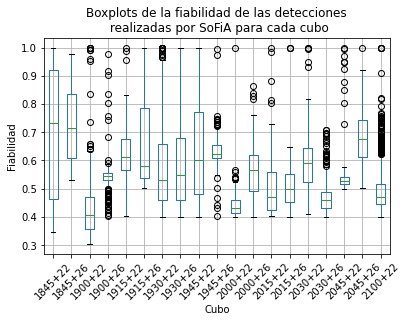

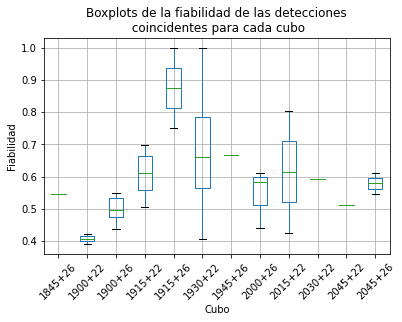

In [149]:
#Dataframe comparación relaibility entre cubos
cub_rel_ts = pd.DataFrame(ts, columns = ['rel','cube'])
cub_rel_tm = pd.DataFrame(tm, columns = ['rel','cube'])

#Boxplots relaibility
cub_rel_ts.boxplot(column = ['rel'], by = "cube",
                   rot=45)

plt.title("Boxplots de la fiabilidad de las detecciones\n realizadas por SoFiA para cada cubo")
plt.suptitle('')
plt.xlabel('Cubo')
plt.ylabel('Fiabilidad')
plt.show()

cub_rel_tm.boxplot(column = ['rel'], by = ["cube"],
                   rot=45)

plt.title("Boxplots de la fiabilidad de las detecciones\n coincidentes para cada cubo")
plt.suptitle('')
plt.xlabel('Cubo')
plt.ylabel('Fiabilidad')
plt.show()

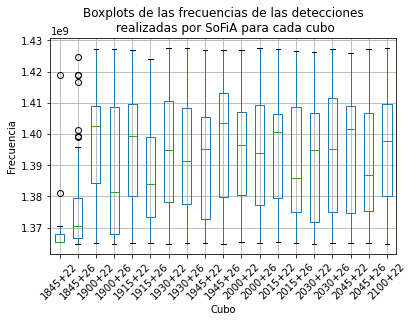

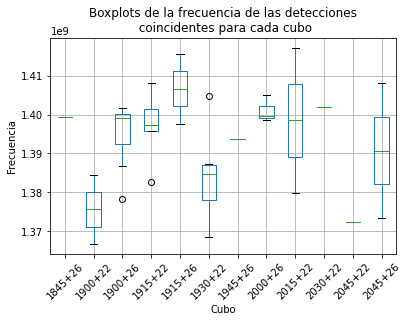

In [152]:
#Dataframe comparación frecuencias entre cubos
cub_freq_ts = pd.DataFrame(ts, columns = ['freq','cube'])
cub_freq_tm = pd.DataFrame(tm, columns = ['freq','cube'])

#Boxplots frecuencias
cub_freq_ts.boxplot(column = ['freq'], by = "cube",
                   rot=45)

plt.title("Boxplots de las frecuencias de las detecciones\n realizadas por SoFiA para cada cubo")
plt.suptitle('')
plt.xlabel('Cubo')
plt.ylabel('Frecuencia (Hz)')
plt.show()

cub_freq_tm.boxplot(column = ['freq'], by = ["cube"],
                   rot=45)

plt.title("Boxplots de la frecuencia de las detecciones\n coincidentes para cada cubo")
plt.suptitle('')
plt.xlabel('Cubo')
plt.ylabel('Frecuencia (Hz)')
plt.show()

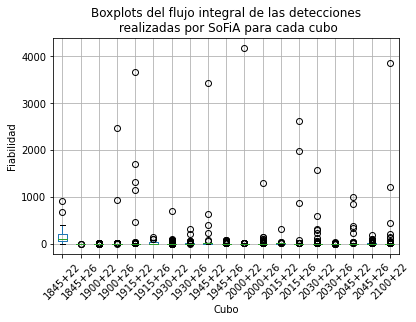

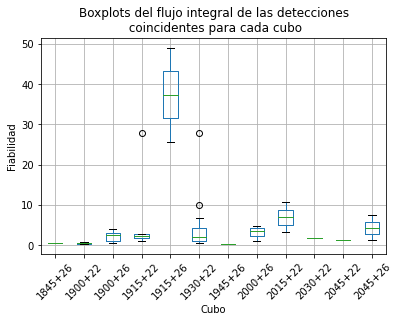

In [154]:
#Dataframe comparación flujo integral entre cubos
cub_flux_ts = pd.DataFrame(ts, columns = ['f_int','cube'])
cub_flux_tm = pd.DataFrame(tm, columns = ['f_int','cube'])

#Boxplots flujo integral
cub_flux_ts.boxplot(column = ['f_int'], by = "cube",
                   rot=45)

plt.title("Boxplots del flujo integral de las detecciones\n realizadas por SoFiA para cada cubo")
plt.suptitle('')
plt.xlabel('Cubo')
plt.ylabel('Fiabilidad')
plt.show()

cub_flux_tm.boxplot(column = ['f_int'], by = ["cube"],
                   rot=45)

plt.title("Boxplots del flujo integral de las detecciones\n coincidentes para cada cubo")
plt.suptitle('')
plt.xlabel('Cubo')
plt.ylabel('Fiabilidad')
plt.show()